In [1]:
import numpy as np
import os
import cv2 as cv

from constants import *
from hsv_sliders import *
from image_processing import *


In [2]:
files = os.listdir(INPUT_DIR)

solutions = sorted([file for file in files if os.path.splitext(file)[1] == ".txt"])
photos = sorted([file for file in files if os.path.splitext(file)[1] == ".jpg"])

print(photos)


['1_01.jpg', '1_02.jpg', '1_03.jpg', '1_04.jpg', '1_05.jpg', '1_06.jpg', '1_07.jpg', '1_08.jpg', '1_09.jpg', '1_10.jpg', '1_11.jpg', '1_12.jpg', '1_13.jpg', '1_14.jpg', '1_15.jpg', '1_16.jpg', '1_17.jpg', '1_18.jpg', '1_19.jpg', '1_20.jpg', '1_21.jpg', '1_22.jpg', '1_23.jpg', '1_24.jpg', '1_25.jpg', '1_26.jpg', '1_27.jpg', '1_28.jpg', '1_29.jpg', '1_30.jpg', '1_31.jpg', '1_32.jpg', '1_33.jpg', '1_34.jpg', '1_35.jpg', '1_36.jpg', '1_37.jpg', '1_38.jpg', '1_39.jpg', '1_40.jpg', '1_41.jpg', '1_42.jpg', '1_43.jpg', '1_44.jpg', '1_45.jpg', '1_46.jpg', '1_47.jpg', '1_48.jpg', '1_49.jpg', '1_50.jpg', '2_01.jpg', '2_02.jpg', '2_03.jpg', '2_04.jpg', '2_05.jpg', '2_06.jpg', '2_07.jpg', '2_08.jpg', '2_09.jpg', '2_10.jpg', '2_11.jpg', '2_12.jpg', '2_13.jpg', '2_14.jpg', '2_15.jpg', '2_16.jpg', '2_17.jpg', '2_18.jpg', '2_19.jpg', '2_20.jpg', '2_21.jpg', '2_22.jpg', '2_23.jpg', '2_24.jpg', '2_25.jpg', '2_26.jpg', '2_27.jpg', '2_28.jpg', '2_29.jpg', '2_30.jpg', '2_31.jpg', '2_32.jpg', '2_33.jpg', '2_

In [3]:
def show_img(p_img):
    plt.figure(dpi = 200)
    plt.imshow(cv.cvtColor(p_img, cv.COLOR_BGR2RGB))
    plt.show()

def process_square(p_sq):
    hsv_sq = cv.cvtColor(p_sq, cv.COLOR_BGR2HSV)
    sat_mask = np.zeros((p_sq.shape[0], p_sq.shape[1]), np.uint8)
    val_mask = np.zeros((p_sq.shape[0], p_sq.shape[1]), np.uint8)

    _, val_mask = cv.threshold(hsv_sq[:, :, VALUE], SQUARE_MIN_VALUE, 256, cv.THRESH_BINARY)
    _, sat_mask = cv.threshold(hsv_sq[:, :, VALUE], 256, SQUARE_MAX_SATURATION, cv.THRESH_BINARY)

    return cv.bitwise_or(sat_mask, val_mask)

def show_squares(p_board):
    for i in range(TOTAL_SQUARES):

        plt.figure(dpi = 200)
        for j in range(TOTAL_SQUARES):
            sq = get_square(p_board, j, i)
            mask = process_square(sq)

            plt.subplot(1, TOTAL_SQUARES, j + 1)
            plt.imshow(mask)
            plt.axis("off")
        plt.show()

In [4]:
# hsv_sliders(photos[0], 0.19, 0.19)


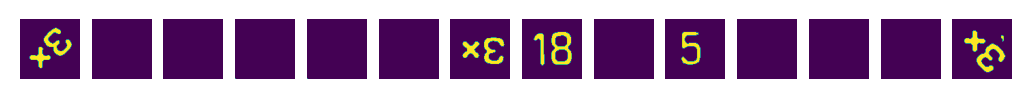

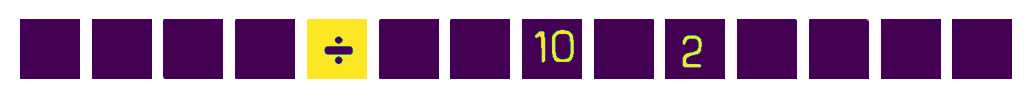

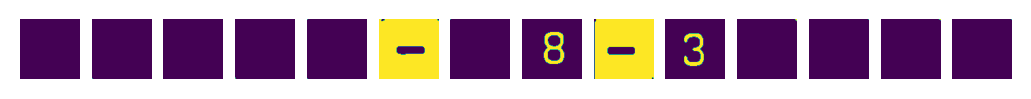

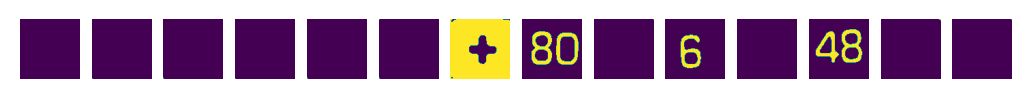

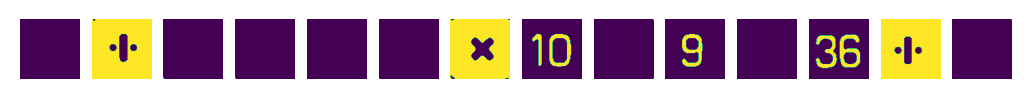

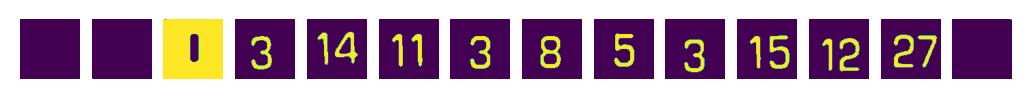

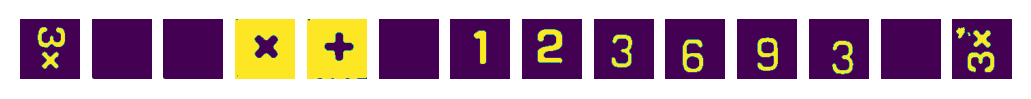

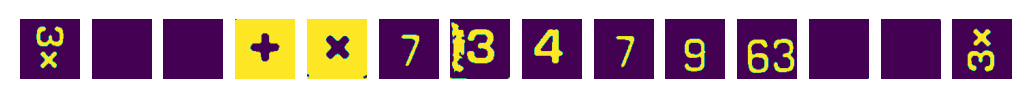

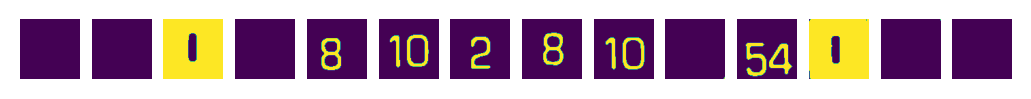

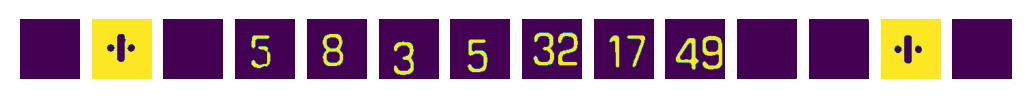

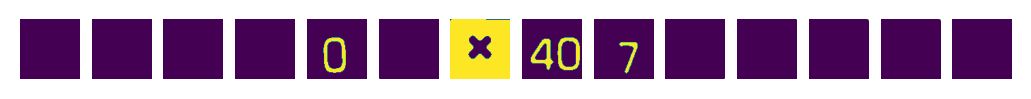

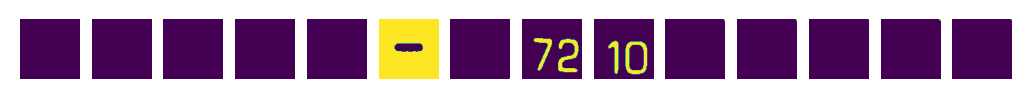

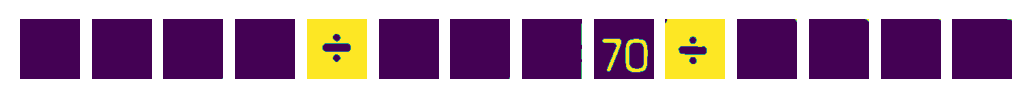

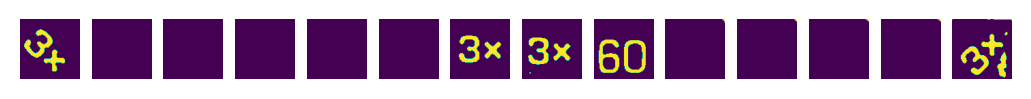

In [5]:
# for photo in photos: 
photo = photos[49]
board = get_trimmed(photo)
# show_img(board)

board = cv.medianBlur(board, 5)
# show_img(board)

alpha = 2
beta = -0.5
gamma = 0
flt_board = cv.addWeighted(src1=board, src2=board, alpha=alpha, beta=beta, gamma=gamma)
flt_board = 255 - flt_board


# kernel = np.ones((3, 3), np.uint8)
# thresh = cv.erode(flt_board, kernel)

show_squares(flt_board)
# show_img(flt_board)

# hsv_sliders(flt_board, RESIZE_SHOW, RESIZE_SHOW)
